Análise Exploratória de Dados de Vendas da Rede de Supermercados Wallmart

- Fonte dos dados: Kaggle.com

Nosso objetivo principal com estes dados é:
- Apresentar os resultados obtidos por unidades de negócio.
- Se feriados impactam no resultado de vendas (quais feriados apresentaram aumento de vendas, e se algum feriado apresentou resultado menor em vendas, se comparado a dias normais normais)

### Carregamento de Bibliotecas

In [1]:
# Leitura e manipulacao de Dados

import pandas as pd
import numpy as np
import sidetable as stb

# Graficos
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt  

# Tema utilizado
import seaborn as sns
sns.set_theme() # Seaborn como tema padrão para visualizações:

In [2]:
df = pd.read_csv(r'Walmart_Store_sales.csv')

### Informações a respeito do tipo de dado presente na base

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Número de Linhas e Colunas

In [4]:
df.shape

(6435, 8)

In [5]:
# Check dados incompletos
df.isnull().sum().sort_values(ascending=False).head()

Unemployment    0
CPI             0
Fuel_Price      0
Temperature     0
Holiday_Flag    0
dtype: int64

In [6]:
# Check linhas duplicadas
len(df)-len(df.drop_duplicates())

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [8]:
# Categories list 

X = df # X = dataframe

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique   categories".format(col_name=col_name, unique_cat=unique_cat))


Feature 'Date' has 143 unique   categories


In [9]:
# Separating data into categorical and numerical

# Listing features categorical and numerical:
categorical_attributes = list(X.select_dtypes(include=['object']).columns)
numerical_attributes = list(X.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['Date']
numerical_attributes: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


# Arredondamento de casas decimais

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [12]:
df['Store'].nunique()

45

### Há 45 lojas distintas

In [13]:
df.loc[df['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


### Não há valores negativos ou zerados na tabela de vendas

# Vendas por Loja durante todo o período

In [14]:
df.stb.freq(['Store'], value='Weekly_Sales')

,Store,Weekly_Sales,percent,cumulative_Weekly_Sales,cumulative_percent
0,20,301397792.46,4.47,301397792.46,4.47
1,4,299543953.38,4.45,600941745.84,8.92
2,14,288999911.34,4.29,889941657.18,13.21
3,13,286517703.80,4.25,1176459360.98,17.46
4,2,275382440.98,4.09,1451841801.96,21.55
5,10,271617713.89,4.03,1723459515.85,25.58
6,27,253855916.88,3.77,1977315432.73,29.35
7,6,223756130.64,3.32,2201071563.37,32.67
8,1,222402808.85,3.30,2423474372.22,35.97
9,39,207445542.47,3.08,2630919914.69,39.05


### Top 10 Lojas que apresentaram maiores vendas

In [15]:
xd = df.stb.freq(['Store'], value='Weekly_Sales')
xd[:10]

,Store,Weekly_Sales,percent,cumulative_Weekly_Sales,cumulative_percent
0,20,301397792.46,4.47,301397792.46,4.47
1,4,299543953.38,4.45,600941745.84,8.92
2,14,288999911.34,4.29,889941657.18,13.21
3,13,286517703.80,4.25,1176459360.98,17.46
4,2,275382440.98,4.09,1451841801.96,21.55
5,10,271617713.89,4.03,1723459515.85,25.58
6,27,253855916.88,3.77,1977315432.73,29.35
7,6,223756130.64,3.32,2201071563.37,32.67
8,1,222402808.85,3.30,2423474372.22,35.97
9,39,207445542.47,3.08,2630919914.69,39.05


### As lojas listadas abaixo são responsáveis por aprox 50% das vendas realizadas ao longo de todo o período

In [16]:
df.stb.freq(['Store'], value='Weekly_Sales', thresh=50, other_label = "Outras Lojas")

,Store,Weekly_Sales,percent,cumulative_Weekly_Sales,cumulative_percent
0,20.00,301397792.46,4.47,301397792.46,4.47
1,4.00,299543953.38,4.45,600941745.84,8.92
2,14.00,288999911.34,4.29,889941657.18,13.21
3,13.00,286517703.80,4.25,1176459360.98,17.46
4,2.00,275382440.98,4.09,1451841801.96,21.55
5,10.00,271617713.89,4.03,1723459515.85,25.58
6,27.00,253855916.88,3.77,1977315432.73,29.35
7,6.00,223756130.64,3.32,2201071563.37,32.67
8,1.00,222402808.85,3.30,2423474372.22,35.97
9,39.00,207445542.47,3.08,2630919914.69,39.05


# Informações a respeito das Datas

In [17]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


### Dados de data começam em 05-02-2010 e vão até 26-10-2012

# Feriados

In [18]:
df.loc[df['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
31,1,10-09-2010,1507460.69,1,78.69,2.56,211.50,7.79
42,1,26-11-2010,1955624.11,1,64.52,2.73,211.75,7.84
47,1,31-12-2010,1367320.01,1,48.43,2.94,211.40,7.84
53,1,11-02-2011,1649614.93,1,36.39,3.02,212.94,7.74
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.74,186.67,8.62
6386,45,25-11-2011,1170672.94,1,48.71,3.49,188.35,8.52
6391,45,30-12-2011,869403.63,1,37.79,3.39,189.06,8.52
6397,45,10-02-2012,803657.12,1,37.00,3.64,189.71,8.42


# Análises

### As semanas com feriados apresentaram maiores resultados que semanas normais?

### Resposta: Sim, no entanto alguns feriados não apresentaram diferenças significativas em comparação a dias normais, mais detalhes apresentados abaixo:

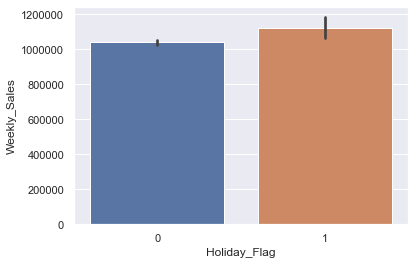

In [74]:
ax = sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

In [75]:
df_feriado = df.loc[df['Holiday_Flag']==True]
df_feriado['Date'].unique()

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [56]:
# Super bowl
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012'),'Super_Bowl'] = False

In [57]:
# Labor day
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-2011')&(df['Date'] != '07-09-2012'),'Labor_Day'] = False

In [58]:
# Thanks_giving
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011'),'Thanks_giving'] = True
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '25-11-2011'),'Thanks_giving'] = False

In [59]:
# Fim_de_ano
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011'),'Fim_de_ano'] = True
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011'),'Fim_de_ano'] = False

In [81]:
# Novo dataframe com false e true para feriados
df.sort_values(by='Fim_de_ano', ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanks_giving,Fim_de_ano
1620,12,31-12-2010,891736.91,1,45.64,3.15,127.09,14.31,False,False,False,True
1906,14,31-12-2010,1623716.46,1,29.67,3.18,182.57,8.72,False,False,False,True
3531,25,30-12-2011,683665.37,1,32.42,3.39,212.40,7.08,False,False,False,True
5104,36,30-12-2011,287425.22,1,48.26,3.13,218.23,7.72,False,False,False,True
4532,32,30-12-2011,1102367.65,1,32.99,3.12,196.36,8.51,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2157,16,30-04-2010,383550.93,0,37.75,2.77,189.58,6.84,False,False,False,False
2156,16,23-04-2010,370230.94,0,44.90,2.78,189.62,6.84,False,False,False,False
2155,16,16-04-2010,436312.41,0,45.69,2.77,189.66,6.84,False,False,False,False
2154,16,09-04-2010,424083.99,0,34.21,2.75,189.69,6.84,False,False,False,False


### Comparação: Vendas em datas específicas (feriados) e dias normais

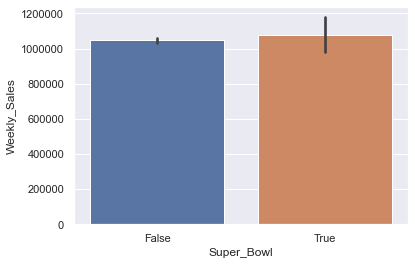

In [76]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)
plt.ticklabel_format(style='plain', axis='y')

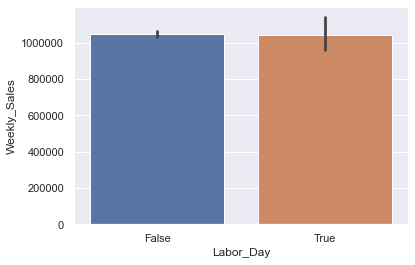

In [77]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)
plt.ticklabel_format(style='plain', axis='y')

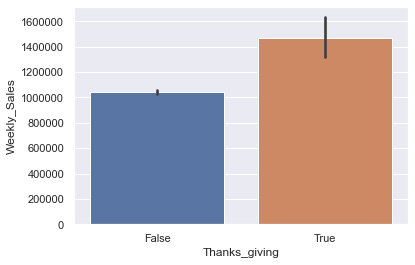

In [78]:
sns.barplot(x='Thanks_giving', y='Weekly_Sales', data=df)
plt.ticklabel_format(style='plain', axis='y')

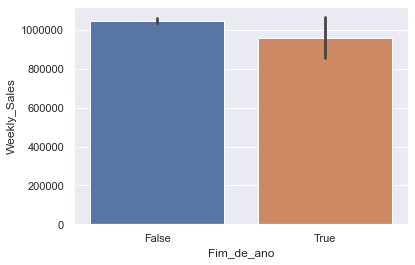

In [79]:
sns.barplot(x='Fim_de_ano', y='Weekly_Sales', data=df)
plt.ticklabel_format(style='plain', axis='y')

- Os dados mostram que as semanas que contém os feriados de Thanks Giving (Ação de Graças) apresentam maiores vendas, este valor pode ter sido significativamente maior para empresas que atuam no mesmo setor do Wallmart, no entanto, isto não faz parte do escopo da análise.
- Além disso, a semana de Fim de Ano, apresentou vendas menores, possivelmente os consumidores podem ter antecipado compras p/ não deixar para a última hora.

# Estatística

- Correlação é um indicador estatístico que mede o nível de dependência linear entre duas variáveis.
- Está definida no intervalo [-1 até 1].
- Se a correlação é negativa, indica que as variáveis são inversamente proporcinais: quando uma aumenta, a outra diminui. Se é positiva, indica que as variáveis são diretamente proporcionais.
- Vale ressaltar que correlação não implica em causalidade.

In [31]:
correlacao = df.corr()
correlacao

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00,-0.34,0.00,-0.02,0.06,-0.21,0.22
Weekly_Sales,-0.34,1.00,0.04,-0.06,0.01,-0.07,-0.11
Holiday_Flag,0.00,0.04,1.00,-0.16,-0.08,-0.00,0.01
Temperature,-0.02,-0.06,-0.16,1.00,0.14,0.18,0.10
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.03
CPI,-0.21,-0.07,-0.00,0.18,-0.17,1.00,-0.30
Unemployment,0.22,-0.11,0.01,0.10,-0.03,-0.30,1.00


- A tabela acima, mostra a correlação entre todas as informações presentes na base de dados.
- Podemos ver que há correlação positiva entre vendas e dias de feriado.
- Adicionamente, a temperatura possui correlação fraca com vendas. 

# A matriz de correlação abaixo pode facilitar a leitura (cores mais quentes para correlação forte, e cores frias para correlação fraca). 

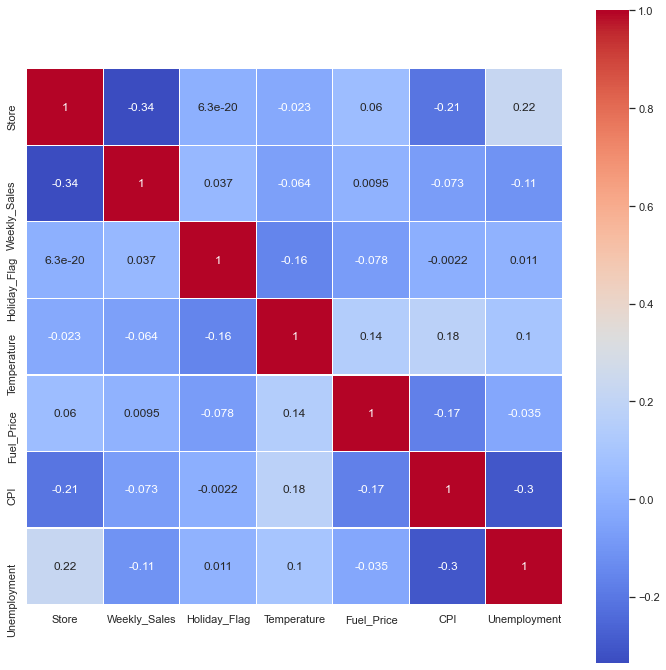

In [32]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

# Conclusões:

###  Algumas datas de feriados apresentaram aumento significativo nas vendas
### Este estudo têm por objetivo apresentar uma análise exploratória dos dados
### No entanto, outras variáveis como: temperatura, sazonalidade, níveis de desemprego e CPI (Consumer Price Index, similar ao IPCA no Brasil) podem ser objetos de análises futuras.
### Há a possibilidade da utilização de Modelos de Séries Temporais p/ modelagem e previsão de receitas futuras (por exemplo)
### O uso de Séries Temporais estará presente na segunda parte.
### Obrigado